In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2

In [2]:
ls

rotations_results_10000.txt     Untitled.ipynb
rotations_results_20000.txt     upright_results_10000.txt
rotations_results_bifuse_1.txt  upright_results_20000.txt
rotations_results_bifuse.txt    upright_results.txt
rotations_results.txt


In [176]:
rot_results = pd.read_csv('rotations_results.txt')
upright_results = pd.read_csv('upright_results.txt')
old_upright_results = pd.read_csv('upright_results_20000.txt')

In [177]:
len(rot_results)

10000

In [178]:
rot_results[rot_results['abs_rel'] > 100]

,input,rand_x,rand_y,abs_rel,sq_rel,rms_sq_lin,rms_sq_log,d1,d2,d3


In [179]:
rot_results.mean()

rand_x        0.118285
rand_y       -0.192991
abs_rel       0.180376
sq_rel        0.123711
rms_sq_lin    0.352273
rms_sq_log    0.062769
d1            0.711318
d2            0.928799
d3            0.978888
dtype: float64

In [180]:
upright_results.mean()

rand_x        0.118285
rand_y       -0.192991
abs_rel       0.115596
sq_rel        0.054777
rms_sq_lin    0.139700
rms_sq_log    0.028935
d1            0.867730
d2            0.974091
d3            0.992811
dtype: float64

In [182]:
acc_map = np.zeros((18,36))
frq_map = np.zeros((18,36))

for idx, row in rot_results.iterrows():
    x_idx = int((row['rand_x'] + 180) / 10)
    y_idx = int((row['rand_y'] + 90) / 10)

    acc_map[y_idx][x_idx] += row['abs_rel']
    frq_map[y_idx][x_idx] += 1
    
rot_err_map = acc_map/frq_map

In [183]:
acc_map = np.zeros((18,36))
frq_map = np.zeros((18,36))

for idx, row in upright_results.iterrows():
    x_idx = int((row['rand_x'] + 180) / 10)
    y_idx = int((row['rand_y'] + 90) / 10)
    
    acc_map[y_idx][x_idx] += row['abs_rel']
    frq_map[y_idx][x_idx] += 1

upright_err_map = acc_map/frq_map

In [184]:
max_error = max(upright_err_map.max(), rot_err_map.max())
min_error = min(upright_err_map.min(), rot_err_map.min())

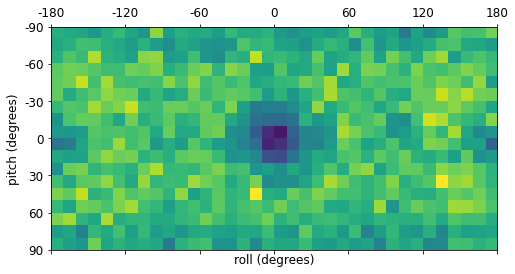

In [187]:
plt.matshow(rot_err_map)
plt.clim(min_error, max_error)
#plt.colorbar(fraction=0.08, pad=0.1)
plt.yticks(np.arange(-.5, 18, 1), np.arange(-90,100,10), fontsize=12)
plt.locator_params(nbins=7, axis='y')
plt.xticks(np.arange(-.5, 36, 1), np.arange(-180,190,10), fontsize=12)
plt.locator_params(nbins=7, axis='x')
plt.xlabel('roll (degrees)', fontsize=12)
plt.ylabel('pitch (degrees)', fontsize=12)
plt.show()


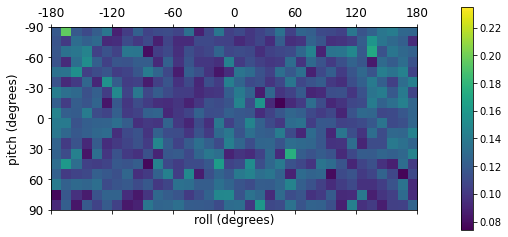

In [199]:
plt.matshow(upright_err_map)
plt.clim(min_error, max_error)
plt.colorbar(fraction=0.08, pad=0.1)
plt.yticks(np.arange(-.5, 18, 1), np.arange(-90,100,10), fontsize=12)
plt.locator_params(nbins=7, axis='y')
plt.xticks(np.arange(-.5, 36, 1), np.arange(-180,190,10), fontsize=12, )
plt.locator_params(nbins=7, axis='x')
plt.xlabel('roll (degrees)', fontsize=12)
plt.ylabel('pitch (degrees)', fontsize=12)
plt.show()


In [23]:
upright_results.loc[(upright_results['rand_x'] < -160) & (upright_results['rand_x'] > -170) & (upright_results['rand_y'] < -80)]

,input,rand_x,rand_y,abs_rel,sq_rel,rms_sq_lin,rms_sq_log,d1,d2,d3
75,DR75DR,-164.069658,-85.999212,0.148049,0.051628,0.101959,0.029841,0.811813,0.990527,0.999487
94,DR94DR,-169.493472,-84.963994,0.053788,0.012385,0.035139,0.005685,0.986204,0.998308,0.999877
2012,DR2012DR,-165.175352,-82.761249,0.046594,0.009767,0.026723,0.004674,0.988837,0.999313,0.999954
3611,DR3611DR,-166.132660,-83.768641,0.267263,0.192420,0.386197,0.082233,0.543061,0.909352,0.974202
4850,DR4850DR,-165.926317,-81.312647,0.228740,0.086473,0.111252,0.065909,0.616612,0.928176,0.987472
5782,DR5782DR,-163.105812,-80.660022,0.127419,0.077733,0.284867,0.019859,0.894057,0.996115,0.999992
5983,DR5983DR,-169.332127,-87.566689,0.499460,1.311160,2.317600,0.258682,0.491434,0.757646,0.826012
6026,DR6026DR,-168.267748,-83.734699,0.141760,0.078610,0.274257,0.046126,0.802517,0.970718,0.984631
6418,DR6418DR,-163.665839,-89.165328,0.109472,0.039989,0.109755,0.017935,0.923914,0.994641,0.998856
6703,DR6703DR,-169.884729,-81.541599,0.276439,0.142103,0.191727,0.085926,0.521496,0.891761,0.978073


In [27]:
frq_map.mean() 

10000.0

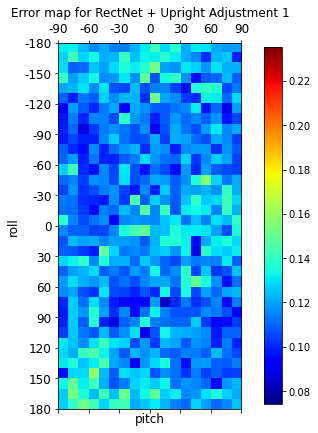

In [13]:
acc_map = np.zeros((36,18))
frq_map = np.zeros((36,18))

for idx, row in old_upright_results.iterrows():
    x_idx = int((row['rand_x'] + 180) / 10)
    y_idx = int((row['rand_y'] + 90) / 10)
    
    acc_map[x_idx][y_idx] += row['abs_rel']
    frq_map[x_idx][y_idx] += 1

old_upright_err_map = acc_map/frq_map

plt.matshow(old_upright_err_map, cmap='jet')
plt.clim(min_error, max_error)
plt.colorbar(fraction=0.08, pad=0.1)
plt.xticks(np.arange(-.5, 18, 1), np.arange(-90,100,10), fontsize=12)
plt.locator_params(nbins=9, axis='x')
plt.yticks(np.arange(-.5, 36, 1), np.arange(-180,190,10), fontsize=12)
plt.locator_params(nbins=18, axis='y')
plt.title('Error map for RectNet + Upright Adjustment 1')
plt.xlabel('pitch', fontsize=12)
plt.ylabel('roll', fontsize=12)
plt.show()


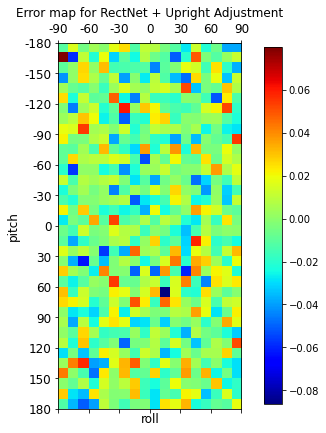

In [35]:
plt.matshow(upright_err_map-old_upright_err_map, cmap='jet')
plt.colorbar(fraction=0.08, pad=0.1)
plt.xticks(np.arange(-.5, 18, 1), np.arange(-90,100,10), fontsize=12)
plt.locator_params(nbins=9, axis='x')
plt.yticks(np.arange(-.5, 36, 1), np.arange(-180,190,10), fontsize=12)
plt.locator_params(nbins=18, axis='y')
plt.title('Error map for RectNet + Upright Adjustment')
plt.xlabel('pitch', fontsize=12)
plt.ylabel('roll', fontsize=12)
plt.show()


In [71]:
old_upright_results.loc[(old_upright_results['rand_x'].abs() < 5) & (old_upright_results['rand_y'].abs() < 5)]['abs_rel'].mean()

0.11388364631463499

In [72]:
upright_results.loc[(upright_results['rand_x'].abs() < 5) & (upright_results['rand_y'].abs() < 5)]['abs_rel'].mean()

0.10899525401847703

In [77]:
upright_results['abs_rel'].iloc[:1000].mean()

0.11367359292507172

In [78]:
old_upright_results['abs_rel'].iloc[:1000].mean()

0.12072196918725968

In [12]:
upright_err_map.max()

0.19561910371367747

In [27]:
rot_err_map.max()

0.2352487165480852

In [13]:
upright_results.loc[upright_results['abs_rel']>0.25]['rand_x'].abs().mean()

92.87679592923878

In [14]:
upright_results['rand_x'].abs().mean()

90.74067200565577

([<matplotlib.axis.XTick at 0x7f63454d6df0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

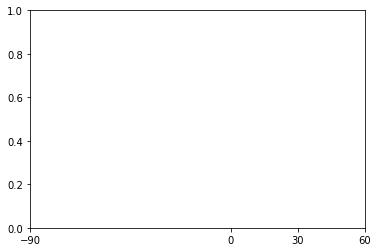

In [15]:
plt.xticks([-90,60,30,0,])